Ethiopian sign language to Amharic Text Translation using LSTM (long short term memory) neural network.

### 1. import and install dependencies

In [121]:
# pip --version

In [8]:
# !pip list

In [9]:
# pip show tensorflow

In [13]:
# pip show mediapipe

In [1]:
import tensorflow as tf

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


### 2. keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
from PIL import ImageFont, ImageDraw, Image

In [7]:
cap = cv2.VideoCapture(0)

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)


#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        #make detaction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image,results)
             
      # Draw Amharic text on the frame
    
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        draw.text((10, 20), 'ሰላም እንዲት ናችሁ?',font=font, fill=font_color)
        image = np.array(img_pil)

        
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
       
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
cap.release()
cv2.destroyAllWindows()

In [9]:
len(results.left_hand_landmarks.landmark)

21

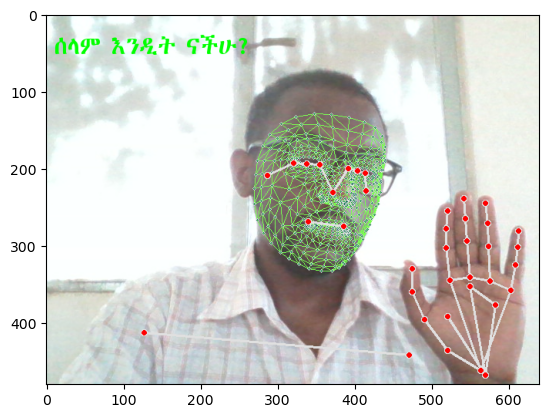

In [10]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

### 3. Extract key point values

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
len(pose)

33

In [14]:
pose[0]

array([ 0.58140242,  0.48275581, -0.81306016,  0.99999565])

In [15]:
len(results.face_landmarks.landmark)*3

1404

In [16]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x,res.y,res.z])
    face.append(test)

In [17]:
len(face)

468

In [19]:
results.pose_landmarks.landmark

[x: 0.5220425
y: 0.6296203
z: -1.03719
visibility: 0.9999122
, x: 0.5448826
y: 0.57162154
z: -0.9430525
visibility: 0.999857
, x: 0.55819273
y: 0.5735361
z: -0.9432246
visibility: 0.99989486
, x: 0.5717226
y: 0.57620835
z: -0.94268405
visibility: 0.99986523
, x: 0.4952956
y: 0.56991297
z: -0.96869504
visibility: 0.999825
, x: 0.47776
y: 0.57057554
z: -0.9678825
visibility: 0.9998204
, x: 0.46119016
y: 0.5724381
z: -0.96837014
visibility: 0.99974835
, x: 0.59307826
y: 0.61258215
z: -0.474183
visibility: 0.9998876
, x: 0.43253884
y: 0.6095028
z: -0.58119154
visibility: 0.9998802
, x: 0.55384266
y: 0.6964779
z: -0.8654083
visibility: 0.9998546
, x: 0.49090356
y: 0.6910315
z: -0.9000012
visibility: 0.9998823
, x: 0.71559477
y: 0.94496566
z: -0.22390258
visibility: 0.99818003
, x: 0.26411587
y: 0.94850576
z: -0.306583
visibility: 0.991274
, x: 0.8670999
y: 1.3870356
z: -0.8008978
visibility: 0.6732416
, x: 0.1508894
y: 1.4321955
z: -0.2677669
visibility: 0.12636058
, x: 0.7620262
y: 0.96634

In [43]:
results.face_landmarks.landmark

[x: 0.49879968
y: 0.5807034
z: -0.035114218
, x: 0.5031048
y: 0.53626996
z: -0.051452715
, x: 0.50045365
y: 0.5537325
z: -0.032074604
, x: 0.4945572
y: 0.5003021
z: -0.033181757
, x: 0.50386953
y: 0.5235704
z: -0.052734055
, x: 0.50389767
y: 0.5096405
z: -0.04636595
, x: 0.50324565
y: 0.47865626
z: -0.013430253
, x: 0.4263675
y: 0.47798765
z: 0.016723564
, x: 0.5040498
y: 0.4475484
z: -0.0003940268
, x: 0.5048297
y: 0.43015957
z: 0.0017542811
, x: 0.50728977
y: 0.3792649
z: 0.022696598
, x: 0.49839136
y: 0.58648634
z: -0.0343557
, x: 0.49779916
y: 0.59163696
z: -0.03230737
, x: 0.49727696
y: 0.59413916
z: -0.029124167
, x: 0.49568084
y: 0.61133206
z: -0.027001351
, x: 0.49560112
y: 0.61567324
z: -0.029461008
, x: 0.4952503
y: 0.6217455
z: -0.033180706
, x: 0.49463448
y: 0.62915176
z: -0.03404495
, x: 0.49337927
y: 0.6435493
z: -0.030250825
, x: 0.5020032
y: 0.54432094
z: -0.047727685
, x: 0.49081796
y: 0.54496264
z: -0.03653962
, x: 0.39366353
y: 0.43400183
z: 0.06736586
, x: 0.4557878

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility]
                for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(21*3)

In [19]:
face = np.array([[res.x, res.y, res.z]
                for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [20]:
lh = np.array([[res.x, res.y, res.z]
                for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
                

In [47]:
lh

array([ 8.95305455e-01,  8.65858018e-01,  4.06333641e-07,  8.28801215e-01,
        8.31700385e-01, -1.65742710e-02,  7.80015051e-01,  7.72291124e-01,
       -2.36484781e-02,  7.59874165e-01,  7.09666073e-01, -3.02623641e-02,
        7.54220486e-01,  6.57796443e-01, -3.55185755e-02,  8.15334439e-01,
        6.72787845e-01, -4.83027566e-03,  7.97859490e-01,  5.92692614e-01,
       -1.92899145e-02,  7.91425407e-01,  5.42660773e-01, -3.23093943e-02,
        7.88916469e-01,  5.00540316e-01, -4.15452309e-02,  8.54068696e-01,
        6.58373296e-01, -8.48442037e-03,  8.45939279e-01,  5.68856657e-01,
       -1.83518436e-02,  8.42519283e-01,  5.12077808e-01, -2.94716917e-02,
        8.41958821e-01,  4.65890527e-01, -3.78071703e-02,  8.92282605e-01,
        6.62590265e-01, -1.58110540e-02,  8.88504267e-01,  5.77322841e-01,
       -2.84456965e-02,  8.85812640e-01,  5.25031567e-01, -3.82094681e-02,
        8.84094298e-01,  4.83280838e-01, -4.51468416e-02,  9.31543827e-01,
        6.81600153e-01, -

In [21]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
rh = np.array([[res.x, res.y, res.z]
                for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
 extract_keypoints(results)[:-10]

array([ 0.58140242,  0.48275581, -0.81306016, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
468*3+33*4+21*3+21*3

1662

### 4. Setup Folders for Collection

In [ ]:
# Data_PATH = "C:/Users/Elias/Desktop/Project-Feb to/ESLT-1/MP_DATA"

In [27]:
# DATA_PATH = os.path.join('Greeting_Data5') # path for exported numpy array
actions = np.array(['ሰላም','ነው','አላህ','እግዚአብሔር','ይመስገን','ስምህ ማነው','አመሰግናለሁ','እንተዋወቅ','ይቅርታ','ደህና ሁን']) #action try to detact
no_sequences = 10 # Thirty videos of worth data
sequence_length = 10 # videos are going to be 10 frame in length

In [29]:
actions[6]

'አመሰግናለሁ'

In [376]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect Keypoints Values for Training and Testing

In [377]:
cap = cv2.VideoCapture(0)

#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
   
   # Loop through actions
    for action in actions:
        # Loop through sequences in videos
        for sequence in range(no_sequences):
            # Loop through video length data sequence length
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
                
                #make detaction 
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # draw landmarks
                draw_styled_landmarks(image,results)
                
                #Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully  
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [294]:
cap.release()
cv2.destroyAllWindows()

### 6. Preprocess Data and Create Labels and Features

In [30]:
import tensorflow as tf

In [30]:
# tf.__version__

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'ሰላም': 0,
 'ነው': 1,
 'አላህ': 2,
 'እግዚአብሔር': 3,
 'ይመስገን': 4,
 'ስምህ ማነው': 5,
 'አመሰግናለሁ': 6,
 'እንተዋወቅ': 7,
 'ይቅርታ': 8,
 'ደህና ሁን': 9}

In [383]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [384]:
np.array(labels).shape

(70,)

In [385]:
np.array(sequences).shape

(70, 10, 1662)

In [386]:
np.array(window).shape

(10, 1662)

In [387]:
# converts the Python list sequences into a NumPy array named x
x = np.array(sequences) 

In [388]:
x.shape

(70, 10, 1662)

In [95]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [389]:
y = to_categorical(labels).astype(int)

In [109]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [390]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [391]:
x_test.shape

(4, 10, 1662)

In [392]:
x_train.shape

(66, 10, 1662)

In [393]:
y_test.shape

(4, 7)

In [394]:
y_train.shape

(66, 7)

### 7. Build and Train LSTM Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
actions.shape[0]

10

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [38]:
actions.shape[0]

10

In [39]:
x.shape

NameError: name 'x' is not defined

In [401]:
res = [0.1,0.3,0.5,0.9,0.3,0.7,0.1]

In [402]:
np.argmax(res)

3

In [403]:
actions[np.argmax(res)]

'ሰላም'

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [405]:
# # train a neural network model with input data x_train and corresponding labels y_train for 2000 epochs

model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback]) 

Epoch 1/2000
3/3 [==============================] - 14s 36ms/step - loss: 1.9497 - categorical_accuracy: 0.1515
Epoch 2/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.9679 - categorical_accuracy: 0.1515
Epoch 3/2000
3/3 [==============================] - 0s 35ms/step - loss: 1.9259 - categorical_accuracy: 0.1818
Epoch 4/2000
3/3 [==============================] - 0s 33ms/step - loss: 1.9059 - categorical_accuracy: 0.1667
Epoch 5/2000
3/3 [==============================] - 0s 34ms/step - loss: 1.9640 - categorical_accuracy: 0.1970
Epoch 6/2000
3/3 [==============================] - 0s 34ms/step - loss: 1.8204 - categorical_accuracy: 0.2576
Epoch 7/2000
3/3 [==============================] - 0s 34ms/step - loss: 1.7534 - categorical_accuracy: 0.2424
Epoch 8/2000
3/3 [==============================] - 0s 34ms/step - loss: 1.7236 - categorical_accuracy: 0.2576
Epoch 9/2000
3/3 [==============================] - 0s 34ms/step - loss: 1.7021 - categorical_accuracy: 0.2576


3/3 [==============================] - 0s 31ms/step - loss: 0.6259 - categorical_accuracy: 0.7121
Epoch 147/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4208 - categorical_accuracy: 0.8333
Epoch 148/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.4039 - categorical_accuracy: 0.8333
Epoch 149/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.3262 - categorical_accuracy: 0.8788
Epoch 150/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.3253 - categorical_accuracy: 0.9091
Epoch 151/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.3328 - categorical_accuracy: 0.8636
Epoch 152/2000
3/3 [==============================] - 0s 29ms/step - loss: 1.6852 - categorical_accuracy: 0.6515
Epoch 153/2000
3/3 [==============================] - 0s 34ms/step - loss: 1.7777 - categorical_accuracy: 0.5000
Epoch 154/2000
3/3 [==============================] - 0s 33ms/step - loss: 1.1710 - categorical_accuracy: 0.560

3/3 [==============================] - 0s 34ms/step - loss: 0.6869 - categorical_accuracy: 0.7727
Epoch 291/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.6932 - categorical_accuracy: 0.7727
Epoch 292/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.6149 - categorical_accuracy: 0.7879
Epoch 293/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.6928 - categorical_accuracy: 0.7121
Epoch 294/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.7021 - categorical_accuracy: 0.7424
Epoch 295/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.5622 - categorical_accuracy: 0.8333
Epoch 296/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.5371 - categorical_accuracy: 0.8485
Epoch 297/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.5793 - categorical_accuracy: 0.8182
Epoch 298/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.7495 - categorical_accuracy: 0.651

3/3 [==============================] - 0s 36ms/step - loss: 0.4582 - categorical_accuracy: 0.8636
Epoch 435/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4821 - categorical_accuracy: 0.8485
Epoch 436/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.4106 - categorical_accuracy: 0.8333
Epoch 437/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.4135 - categorical_accuracy: 0.8333
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3930 - categorical_accuracy: 0.8333
Epoch 439/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.4096 - categorical_accuracy: 0.8333
Epoch 440/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.3833 - categorical_accuracy: 0.8788
Epoch 441/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.3876 - categorical_accuracy: 0.8636
Epoch 442/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.3784 - categorical_accuracy: 0.848

3/3 [==============================] - 0s 56ms/step - loss: 0.4234 - categorical_accuracy: 0.8182
Epoch 579/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.3927 - categorical_accuracy: 0.8636
Epoch 580/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3961 - categorical_accuracy: 0.8485
Epoch 581/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3947 - categorical_accuracy: 0.8636
Epoch 582/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3728 - categorical_accuracy: 0.8485
Epoch 583/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.3846 - categorical_accuracy: 0.8485
Epoch 584/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3663 - categorical_accuracy: 0.8788
Epoch 585/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.3598 - categorical_accuracy: 0.8939
Epoch 586/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.3363 - categorical_accuracy: 0.909

3/3 [==============================] - 0s 24ms/step - loss: 0.2660 - categorical_accuracy: 0.9091
Epoch 723/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.2573 - categorical_accuracy: 0.8939
Epoch 724/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.2379 - categorical_accuracy: 0.9091
Epoch 725/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.2322 - categorical_accuracy: 0.9091
Epoch 726/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.2284 - categorical_accuracy: 0.9091
Epoch 727/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.2617 - categorical_accuracy: 0.8788
Epoch 728/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.2798 - categorical_accuracy: 0.8485
Epoch 729/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.2432 - categorical_accuracy: 0.8939
Epoch 730/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.2703 - categorical_accuracy: 0.893

3/3 [==============================] - 0s 57ms/step - loss: 0.5133 - categorical_accuracy: 0.7576
Epoch 867/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4606 - categorical_accuracy: 0.8636
Epoch 868/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4684 - categorical_accuracy: 0.8333
Epoch 869/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5183 - categorical_accuracy: 0.8333
Epoch 870/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.5122 - categorical_accuracy: 0.7879
Epoch 871/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4841 - categorical_accuracy: 0.7576
Epoch 872/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.6953 - categorical_accuracy: 0.6364
Epoch 873/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.5215 - categorical_accuracy: 0.7424
Epoch 874/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.0279 - categorical_accuracy: 0.530

3/3 [==============================] - 0s 59ms/step - loss: 0.0289 - categorical_accuracy: 0.9848
Epoch 1011/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0250 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0225 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0208 - categorical_accuracy: 1.0000
Epoch 1014/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0183 - categorical_accuracy: 1.0000
Epoch 1015/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0174 - categorical_accuracy: 1.0000
Epoch 1016/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0210 - categorical_accuracy: 1.0000
Epoch 1017/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0140 - categorical_accuracy: 1.0000
Epoch 1018/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0143 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.6008 - categorical_accuracy: 0.6970
Epoch 1083/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6474 - categorical_accuracy: 0.6667
Epoch 1084/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5455 - categorical_accuracy: 0.8636
Epoch 1085/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4694 - categorical_accuracy: 0.9394
Epoch 1086/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4621 - categorical_accuracy: 0.9242
Epoch 1087/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4436 - categorical_accuracy: 0.9091
Epoch 1088/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3768 - categorical_accuracy: 0.9242
Epoch 1089/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.3220 - categorical_accuracy: 0.9242
Epoch 1090/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2990 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.2632 - categorical_accuracy: 0.9091
Epoch 1155/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2270 - categorical_accuracy: 0.9242
Epoch 1156/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2122 - categorical_accuracy: 0.9394
Epoch 1157/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2079 - categorical_accuracy: 0.9394
Epoch 1158/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.1980 - categorical_accuracy: 0.9394
Epoch 1159/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1922 - categorical_accuracy: 0.9242
Epoch 1160/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.1842 - categorical_accuracy: 0.9242
Epoch 1161/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1762 - categorical_accuracy: 0.9242
Epoch 1162/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1766 - categorical_accurac

3/3 [==============================] - 0s 34ms/step - loss: 0.1209 - categorical_accuracy: 0.9394
Epoch 1227/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.1023 - categorical_accuracy: 0.9545
Epoch 1228/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0947 - categorical_accuracy: 0.9545
Epoch 1229/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0953 - categorical_accuracy: 0.9697
Epoch 1230/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0938 - categorical_accuracy: 0.9697
Epoch 1231/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0975 - categorical_accuracy: 0.9545
Epoch 1232/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0942 - categorical_accuracy: 0.9545
Epoch 1233/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0859 - categorical_accuracy: 0.9697
Epoch 1234/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0856 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.1566 - categorical_accuracy: 0.9091
Epoch 1299/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.1059 - categorical_accuracy: 0.9545
Epoch 1300/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.1638 - categorical_accuracy: 0.9242
Epoch 1301/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0941 - categorical_accuracy: 0.9697
Epoch 1302/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.1023 - categorical_accuracy: 0.9697
Epoch 1303/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.1126 - categorical_accuracy: 0.9697
Epoch 1304/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0999 - categorical_accuracy: 0.9697
Epoch 1305/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0863 - categorical_accuracy: 0.9697
Epoch 1306/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.1139 - categorical_accurac

3/3 [==============================] - 0s 31ms/step - loss: 0.0708 - categorical_accuracy: 0.9848
Epoch 1371/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0705 - categorical_accuracy: 0.9848
Epoch 1372/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0699 - categorical_accuracy: 0.9848
Epoch 1373/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0681 - categorical_accuracy: 0.9848
Epoch 1374/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0658 - categorical_accuracy: 0.9848
Epoch 1375/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.0630 - categorical_accuracy: 0.9848
Epoch 1376/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0685 - categorical_accuracy: 0.9697
Epoch 1377/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0684 - categorical_accuracy: 0.9697
Epoch 1378/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0663 - categorical_accurac

3/3 [==============================] - 0s 35ms/step - loss: 0.1433 - categorical_accuracy: 0.9848
Epoch 1443/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.1237 - categorical_accuracy: 0.9848
Epoch 1444/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.1364 - categorical_accuracy: 0.9545
Epoch 1445/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.1374 - categorical_accuracy: 0.9545
Epoch 1446/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1140 - categorical_accuracy: 0.9697
Epoch 1447/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0976 - categorical_accuracy: 0.9697
Epoch 1448/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0931 - categorical_accuracy: 0.9697
Epoch 1449/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0913 - categorical_accuracy: 0.9697
Epoch 1450/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0876 - categorical_accurac

3/3 [==============================] - 0s 33ms/step - loss: 0.0150 - categorical_accuracy: 1.0000
Epoch 1515/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0081 - categorical_accuracy: 1.0000
Epoch 1516/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0100 - categorical_accuracy: 1.0000
Epoch 1517/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 1518/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 1519/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 1520/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 1521/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 1522/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0059 - categorical_accurac

3/3 [==============================] - 0s 33ms/step - loss: 0.0951 - categorical_accuracy: 0.9697
Epoch 1587/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0966 - categorical_accuracy: 0.9697
Epoch 1588/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0899 - categorical_accuracy: 0.9697
Epoch 1589/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0871 - categorical_accuracy: 0.9697
Epoch 1590/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0868 - categorical_accuracy: 0.9697
Epoch 1591/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0854 - categorical_accuracy: 0.9697
Epoch 1592/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0938 - categorical_accuracy: 0.9545
Epoch 1593/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.1855 - categorical_accuracy: 0.9394
Epoch 1594/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0805 - categorical_accurac

3/3 [==============================] - 0s 35ms/step - loss: 0.2320 - categorical_accuracy: 0.9545
Epoch 1659/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.2784 - categorical_accuracy: 0.8636
Epoch 1660/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.2473 - categorical_accuracy: 0.8788
Epoch 1661/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2039 - categorical_accuracy: 0.9242
Epoch 1662/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1809 - categorical_accuracy: 0.9545
Epoch 1663/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.1693 - categorical_accuracy: 0.9242
Epoch 1664/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1590 - categorical_accuracy: 0.9242
Epoch 1665/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.1370 - categorical_accuracy: 0.9394
Epoch 1666/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.1024 - categorical_accurac

3/3 [==============================] - 0s 33ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 1731/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 1732/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 1733/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 1734/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 1735/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0042 - categorical_accuracy: 1.0000
Epoch 1736/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1737/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 1738/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0031 - categorical_accurac

3/3 [==============================] - 0s 36ms/step - loss: 0.0303 - categorical_accuracy: 1.0000
Epoch 1874/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0302 - categorical_accuracy: 0.9848
Epoch 1875/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0340 - categorical_accuracy: 0.9848
Epoch 1876/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0418 - categorical_accuracy: 0.9848
Epoch 1877/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0222 - categorical_accuracy: 1.0000
Epoch 1878/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0188 - categorical_accuracy: 1.0000
Epoch 1879/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0230 - categorical_accuracy: 1.0000
Epoch 1880/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0182 - categorical_accuracy: 1.0000
Epoch 1881/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0125 - categorical_accurac

3/3 [==============================] - 0s 34ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1946/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1947/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1948/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1949/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1950/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1951/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1952/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0011 - categorical_accurac

In [406]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10, 64)            442112    
                                                                 
 lstm_22 (LSTM)              (None, 10, 128)           98816     
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 7)                 231       
                                                                 
Total params: 596807 (2.28 MB)
Trainable params: 59680

### 8. Make Predictions

In [407]:
model.predict(x_test)

1/1 [==============================] - 1s 1s/step


array([[9.3048530e-18, 9.9998474e-01, 1.5296189e-05, 7.6518185e-14,
        1.8836191e-13, 3.8217017e-20, 4.8503797e-09],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [3.3404143e-04, 1.8471891e-09, 2.6584725e-04, 9.9939668e-01,
        3.3867298e-06, 8.8358328e-11, 1.9350391e-10],
       [9.9984062e-01, 1.2604427e-12, 7.5040009e-07, 3.3935197e-05,
        4.9257670e-10, 1.2468483e-04, 1.5689227e-18]], dtype=float32)

In [408]:
res = model.predict(x_test)

1/1 [==============================] - 0s 60ms/step


In [409]:
res[0]

array([9.3048530e-18, 9.9998474e-01, 1.5296189e-05, 7.6518185e-14,
       1.8836191e-13, 3.8217017e-20, 4.8503797e-09], dtype=float32)

In [410]:
actions.shape[0]

7

In [411]:
actions[np.argmax(res[2])]

'ሰላም'

In [412]:
actions[np.argmax(y_test[2])]

'ሰላም'

## 9. Save Weights

In [413]:
# model.save('Greeting5.keras')

In [414]:
# model.save('Greeting5.h5')

C:\Users\Elias\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
model.load_weights('GreetingM2.keras')

### 10. Evaluation using Confusion Matrix and Accuracy

In [41]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(x_train)

NameError: name 'x_train' is not defined

In [61]:
yhat

array([[1.38826950e-08, 4.47683085e-10, 2.31141506e-08, 2.73728297e-11,
        1.00000000e+00],
       [8.15244313e-12, 1.76994954e-20, 9.31557942e-10, 1.00000000e+00,
        4.30241170e-14],
       [1.23148309e-08, 1.17336540e-11, 5.65582692e-09, 2.63285106e-11,
        1.00000000e+00],
       [1.51289217e-10, 1.34697326e-21, 5.02499486e-10, 1.00000000e+00,
        3.22423227e-14],
       [1.09388651e-15, 1.89278953e-12, 1.00000000e+00, 3.53374378e-11,
        1.03735924e-15],
       [8.17082402e-09, 1.38711742e-09, 1.20141664e-07, 4.52144260e-11,
        9.99999881e-01],
       [1.00000000e+00, 5.88754978e-20, 1.34008304e-09, 1.74649877e-08,
        1.09363994e-12],
       [2.82397878e-23, 1.00000000e+00, 7.82022017e-12, 1.29576924e-25,
        7.69799988e-11],
       [3.34314027e-20, 1.00000000e+00, 3.16662927e-08, 6.29661403e-22,
        5.37359046e-10],
       [4.32572311e-10, 2.73249777e-20, 1.58631475e-09, 1.00000000e+00,
        1.44043279e-13],
       [8.06462404e-21, 1.0000

In [439]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [183]:
ytrue

[0,
 0,
 1,
 4,
 1,
 4,
 2,
 3,
 1,
 1,
 1,
 0,
 3,
 3,
 1,
 0,
 4,
 0,
 0,
 4,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 0,
 3,
 0,
 4,
 2,
 3,
 2,
 0,
 2,
 0,
 3,
 0,
 3,
 4,
 1,
 2,
 0,
 4,
 2,
 1,
 0,
 2,
 3,
 0,
 3,
 4,
 0,
 2,
 4,
 4,
 4,
 2,
 2,
 4,
 0,
 4,
 2,
 0,
 1,
 2,
 2,
 2,
 3,
 4,
 4,
 2,
 2,
 1,
 0,
 4,
 2,
 3,
 2,
 3,
 0,
 3,
 1,
 3,
 2,
 1,
 1,
 4,
 1,
 3,
 2,
 4,
 1,
 1,
 0,
 3,
 2,
 1,
 4,
 1,
 3,
 4,
 2,
 1,
 0,
 1,
 1,
 2,
 4,
 2,
 3,
 4,
 2,
 4,
 0,
 2,
 3,
 3,
 4,
 1,
 1,
 4,
 0,
 1,
 3,
 3,
 0,
 0,
 4,
 2,
 3,
 4,
 3,
 0,
 4,
 3,
 3,
 0,
 0,
 0]

In [151]:
yhat

[1,
 2,
 0,
 3,
 0,
 0,
 2,
 3,
 2,
 4,
 2,
 0,
 3,
 4,
 1,
 4,
 3,
 1,
 1,
 4,
 0,
 3,
 3,
 0,
 0,
 2,
 1,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 3,
 4,
 2,
 3,
 2,
 1,
 0,
 4,
 2,
 3,
 0,
 3,
 2,
 0,
 0,
 2,
 4,
 3,
 1,
 1,
 0,
 1,
 1,
 4,
 0,
 1,
 1,
 4,
 0,
 1,
 0,
 1,
 2,
 0,
 3,
 3,
 2,
 4,
 0,
 1,
 1,
 0,
 4,
 0,
 3,
 0,
 1,
 3,
 4,
 0,
 0,
 2,
 4,
 1,
 4,
 2,
 2,
 2,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 4,
 3,
 4,
 2,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 3,
 0,
 3,
 2,
 1,
 0,
 0,
 2,
 0,
 3,
 4,
 3,
 4,
 1,
 1,
 2,
 3,
 3,
 2,
 4,
 2,
 2,
 2,
 1,
 4,
 1,
 4,
 4,
 1,
 0]

In [428]:
# multilabel_confusion_matrix??

In [440]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[57,  0],
        [ 0,  9]],

       [[56,  0],
        [ 0, 10]],

       [[56,  0],
        [ 0, 10]],

       [[57,  0],
        [ 0,  9]],

       [[57,  0],
        [ 0,  9]],

       [[56,  0],
        [ 0, 10]],

       [[57,  0],
        [ 0,  9]]], dtype=int64)

In [441]:
accuracy_score(ytrue, yhat)

1.0

## 11. Testing in real time (usng .h5 model)

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [31]:
# DATA_PATH = os.path.join('Greeting_Data5') # path for exported numpy array
actions = np.array(['እንተዋወቅ','ስምህ ማነው','አመሰግናለሁ','ይቅርታ','ደህና ሁን']) #action try to detact

# actions = np.array(['ሰላም','ነው','አላህ','እግዚአብሂር','ይመስገን']) #action try to detact

# actions = np.array(['የ ምልክት ቆንቆ','ታውቃለህ','ትችላለህ','ሰላም','አደርክ','ዋልክ','አመሸህ']) #action try to detact

# actions = np.array(['ሆስፒታል','ሃኪም','ሀኪም','ምርመራ','ትኩሳት']) #action try to detact

no_sequences = 10 # Ten videos of worth data
sequence_length = 10 # videos are going to be 10 frame in length

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
actions.shape[0]

5

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [36]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [197]:
# model.summary()

In [198]:
# model.load_weights('Health1.keras')

In [37]:
model.load_weights('Greeting6.keras')

In [214]:
# model.load_weights('Health1.keras')

In [38]:
from PIL import ImageFont, ImageDraw, Image
from scipy import stats

In [39]:
# colors = [(245,117,16), (117,200,160), (16,117,245),(245,117,16), (117,200,100), (205,117,16), (117,220,160), (217,200,100), (205,217,16), (117,230,160)]

colors = [(245,117,16), (117,200,160), (16,117,245),(245,117,16), (117,200,100), (205,117,16), (117,220,160)]

# Function to render text with Amharic characters on OpenCV image
def render_text_with_amharic(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # Display Amharic text using render_text_with_amharic function
        output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
    return output_frame

In [40]:

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)

# Function to render text on OpenCV image
def render_text(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

       # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        

        # Prediction logic
        keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
        sequence.append(keypoints)
        sequence = sequence[-10:]

        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

#             # Visualize probabilities
#             image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere


        # Render sentence on the frame
        image = cv2.rectangle(image, (0, 0), (640, 40), (240, 240, 240), -1)
        image = render_text(image, ' '.join(sentence), (5, 5))

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 430ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solut

1/1 [==============================] - 0s 22ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.sol

1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
ይቅርታ
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 19ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
አመሰግናለሁ
<class 

1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
ይቅርታ
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 23ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
አመሰግናለሁ
<cla

1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ይቅርታ
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 8ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
ይቅርታ
<class 'mediapipe.python.solutio

1/1 [==============================] - 0s 16ms/step
አመሰግናለሁ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
ይቅርታ
<class 'mediapipe.python.sol

1/1 [==============================] - 0s 23ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 8ms/step
ይቅርታ
<class 'mediapipe.python.solutio

ደህና ሁን
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
ደህና ሁን
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ደህና ሁን
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
እንተዋወቅ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
እንተዋወቅ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
እንተዋወቅ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 8ms/step
እንተዋወቅ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
እንተዋወቅ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
እንተዋወቅ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [====

ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [=====================

1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
ይቅርታ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
ይቅርታ
<class 'mediapipe.python.soluti

In [178]:
cap.release()
cv2.destroyAllWindows()

In [364]:
res[np.argmax(res)] > threshold

False

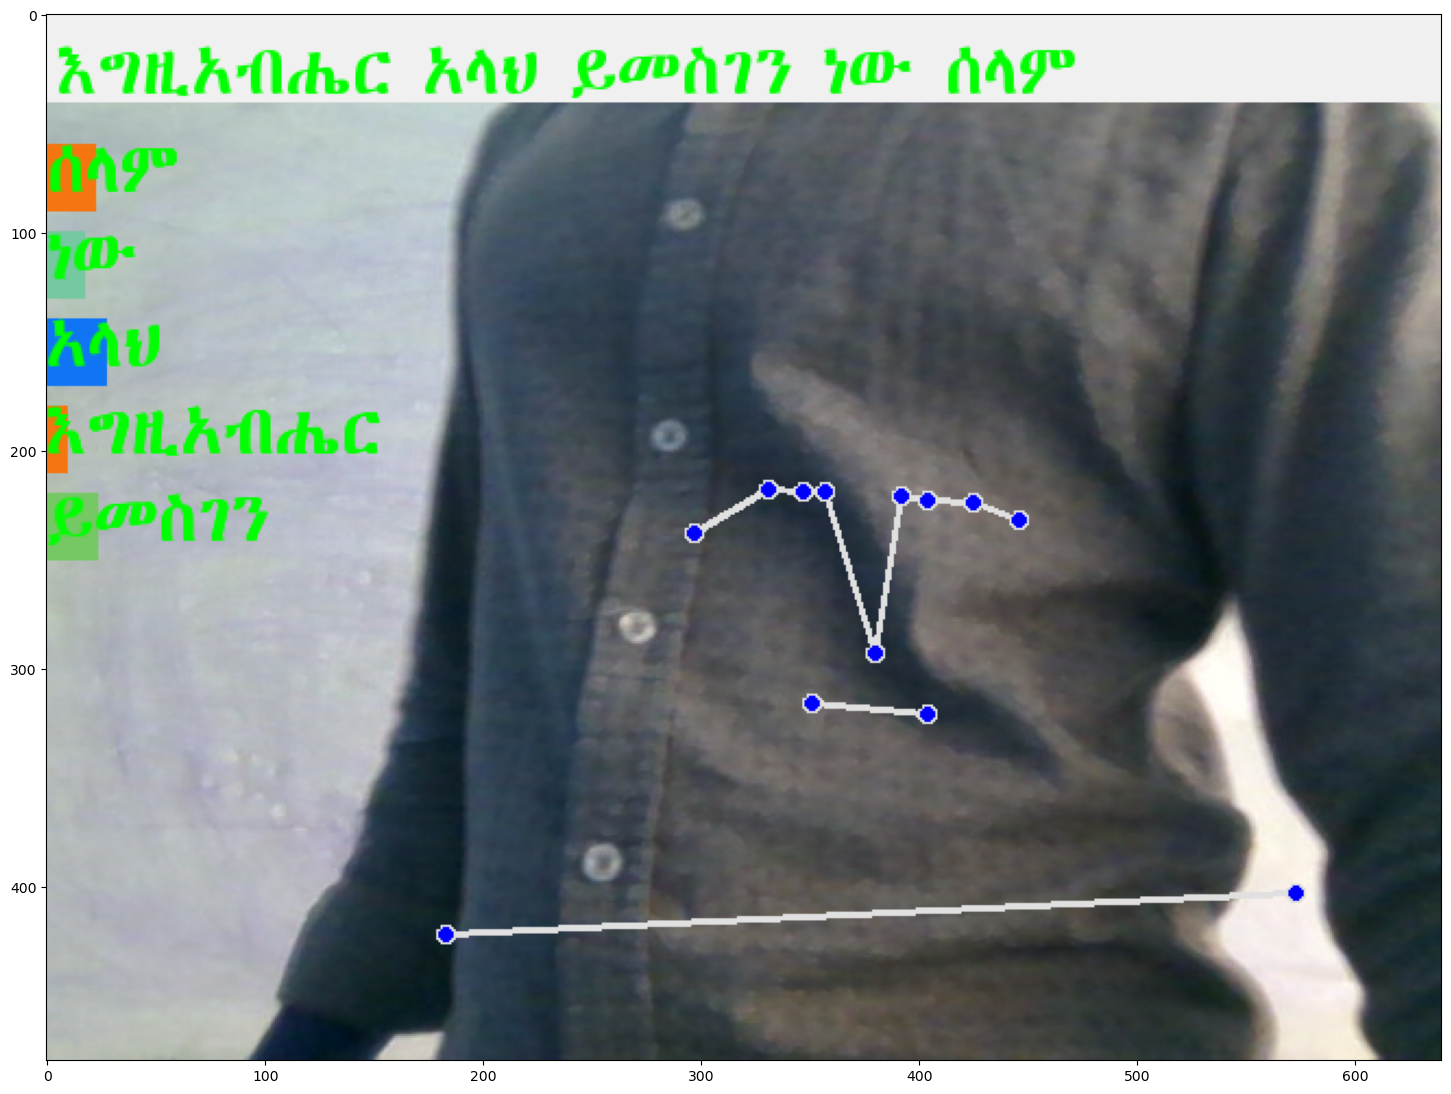

In [365]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [148]:
np.expand_dims(x_test[0], axis=0)

array([[[ 0.55313247,  0.58123988, -1.03259563, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55334145,  0.57986081, -1.0087136 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55338323,  0.57901996, -1.00942826, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.59965652,  0.57502103, -1.26179922, ...,  0.23404279,
          0.5150395 , -0.0121378 ],
        [ 0.59943891,  0.57613385, -1.27742076, ...,  0.23218682,
          0.51297772, -0.01285041],
        [ 0.59921449,  0.57662052, -1.27582788, ...,  0.23205204,
          0.51501346, -0.01659301]]])

In [149]:
model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 25ms/step


array([[4.6221888e-23, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

tflite model for deployment on mobile and embedded devices

## 12. Testing in Real Time (using .tflite model)

In [103]:
filesize = os.path.getsize('tmodel.tflite')

In [104]:
if filesize > 0:
    print("The model file contains data.")
else:
    print("The model file is empty or does not exist.")

The model file contains data.


In [105]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="tmodel.tflite")
interpreter.allocate_tensors()

In [106]:
# Get details about the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [109]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2

In [110]:
colors = [(245,117,16), (117,200,160), (16,117,245)]

# Function to render text with Amharic characters on OpenCV image
def render_text_with_amharic(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # Display Amharic text using render_text_with_amharic function
        output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
    return output_frame

In [247]:
# Set up mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)

# Function to render text on OpenCV image
def render_text(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Make detections
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmarks
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Prediction logic
    keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        # Perform inference with TensorFlow Lite model
        input_data = np.expand_dims(sequence, axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        res = interpreter.get_tensor(output_details[0]['index'])[0]

        predictions.append(np.argmax(res))

        # Sentence formation logic
        if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Visualize probabilities
        image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere

    # Render sentence on the frame
    image = cv2.rectangle(image, (0, 0), (640, 40), (240, 240, 240), -1)
    image = render_text(image, ' '.join(sentence), (5, 5))

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'interpreter' is not defined

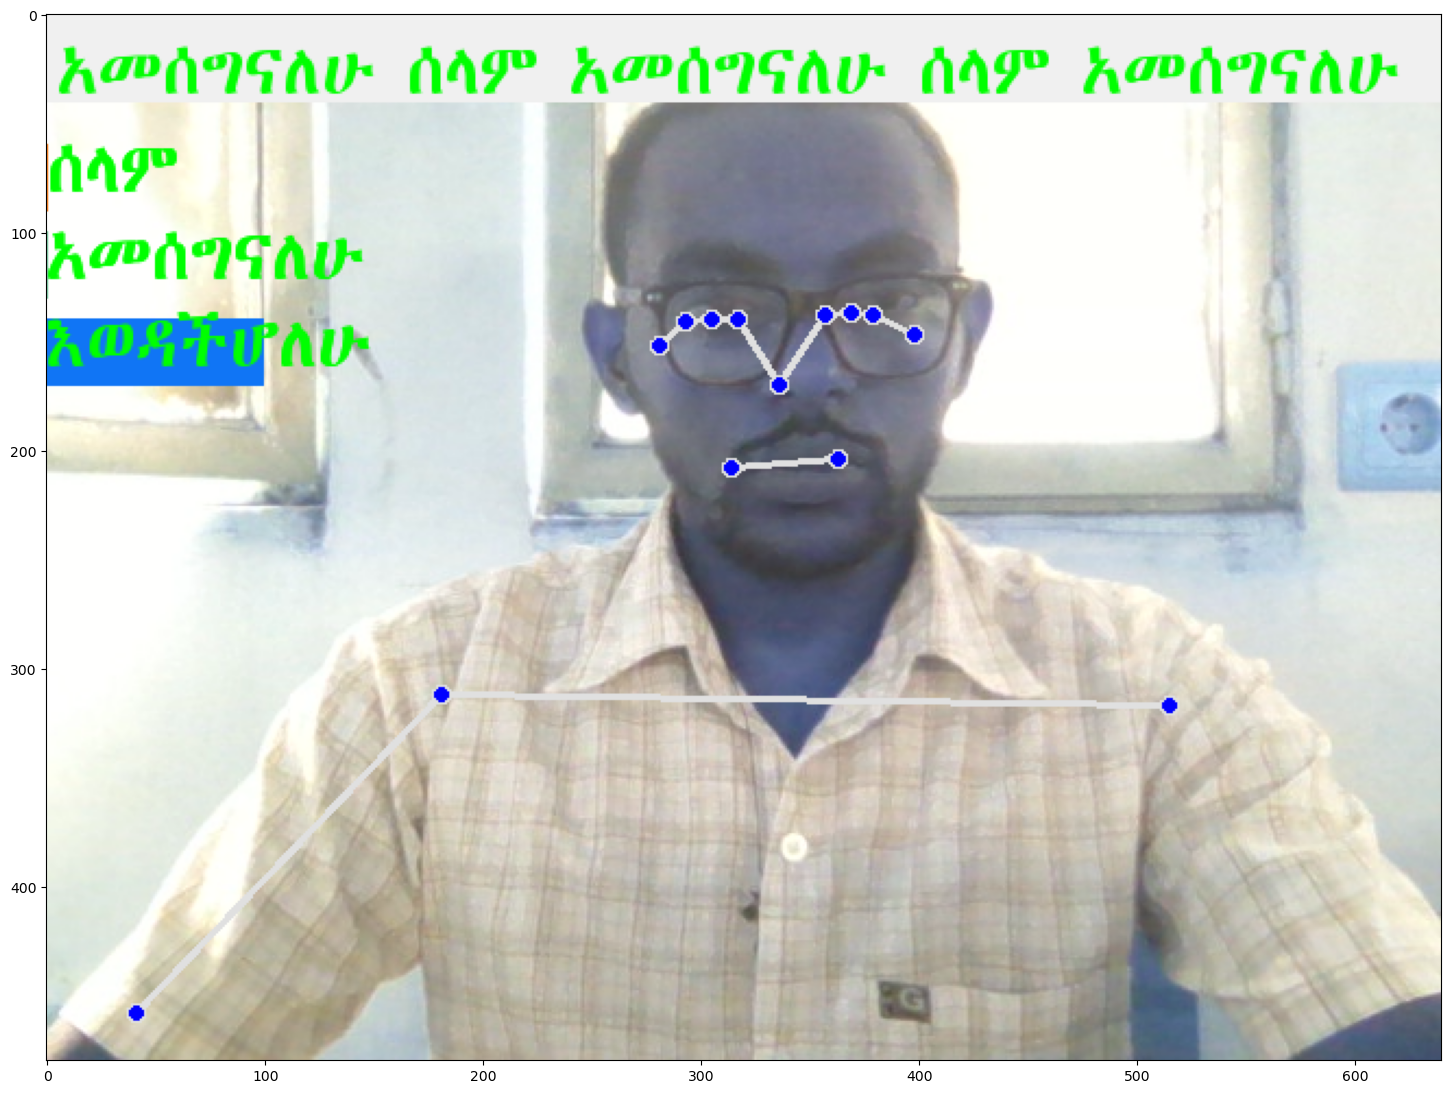

In [116]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [120]:
cap.release()
cv2.destroyAllWindows()


Ethiopian sign language to Amharic text Translation using LSTM (long short term memory) neural network.